In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Understanding the data
#### timestamp - timestamp field for grouping the data
#### cnt - the count of a new bike shares
#### t1 - real temperature in C
#### t2 - temperature in C "feels like"
#### hum - humidity in percentage
#### windspeed - wind speed in km/h
#### weathercode - category of the weather
#### 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
#### 2 = scattered clouds / few clouds
#### 3 = Broken clouds
#### 4 = Cloudy
#### 7 = Rain/ light Rain shower/ Light rain
#### 10 = rain with thunderstorm
#### 26 = snowfall
#### *isholiday** - boolean field - 1 holiday / 0 non holiday
#### isweekend - boolean field - 1 if the day is weekend
#### season - category(0-spring ; 1-summer; 2-fall; 3-winter)

In [31]:
df = pd.read_csv('/Users/giselles/Desktop/mini project/london_merged.csv')
display(df)

timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0      2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
1      2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2      2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
3      2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
4      2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                    ...   ...  ...  ...    ...         ...           ...   
17409  2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
17410  2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
17411  2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
17412  2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
17413  2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

       is_holiday  is_weekend  season  
0             0.0         1.0     3.0  
1             0.0         1.0     3.0  
2             0.0         1.0     3.0  
3             0.0         1.0     3.0  
4             0.0         1.0     3.0  
...           ...         ...     ...  
17409         0.0         0.0     3.0  
17410         0.0         0.0     3.0  
17411         0.0         0.0     3.0  
17412         0.0         0.0     3.0  
17413         0.0         0.0     3.0  

[17414 rows x 10 columns]

In [32]:
df.columns = ['timestamp', 'bike sharing count', 'temperature', 'feeling temperature', 'humidity', 'wind speed', 'weather', 'holiday', 'weekend', 'season']

In [33]:
df.describe().T #bikers prefer no holiday, no weekend, no winter, normal weather, 
#relatively low temp(12+..), low wind speed, high humid, cnt positively skewed, large variance(std) --> preference


count         mean          std   min    25%    50%  \
bike sharing count   17414.0  1143.101642  1085.108068   0.0  257.0  844.0   
temperature          17414.0    12.468091     5.571818  -1.5    8.0   12.5   
feeling temperature  17414.0    11.520836     6.615145  -6.0    6.0   12.5   
humidity             17414.0    72.324954    14.313186  20.5   63.0   74.5   
wind speed           17414.0    15.913063     7.894570   0.0   10.0   15.0   
weather              17414.0     2.722752     2.341163   1.0    1.0    2.0   
holiday              17414.0     0.022051     0.146854   0.0    0.0    0.0   
weekend              17414.0     0.285403     0.451619   0.0    0.0    0.0   
season               17414.0     1.492075     1.118911   0.0    0.0    1.0   

                         75%     max  
bike sharing count   1671.75  7860.0  
temperature            16.00    34.0  
feeling temperature    16.00    34.0  
humidity               83.00   100.0  
wind speed             20.50    56.5  
weather                 3.00    26.0  
holiday                 0.00     1.0  
weekend                 1.00     1.0  
season                  2.00     3.0

In [34]:
weather_mapping = {1.0: 'clear',
                   2.0: 'few clouds',
                   3.0: 'broken clouds',
                   4.0: 'cloudy',
                   7.0: 'light rain',
                   10.0: 'rain with thunderstorm',
                   26.0: 'snowfall'}

df['weather'] = df['weather'].map(weather_mapping)

In [35]:
season_mapping = {0.0: 'spring',
                  1.0: 'summer',
                  2.0: 'fall',
                  3.0: 'winter'}

df['season'] = df['season'].map(season_mapping)

In [36]:
mapping = {0.0: 'no',
           1.0: 'yes'}

df['holiday'] = df['holiday'].map(mapping)
df['weekend'] = df['weekend'].map(mapping)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            17414 non-null  object 
 1   bike sharing count   17414 non-null  int64  
 2   temperature          17414 non-null  float64
 3   feeling temperature  17414 non-null  float64
 4   humidity             17414 non-null  float64
 5   wind speed           17414 non-null  float64
 6   weather              17414 non-null  object 
 7   holiday              17414 non-null  object 
 8   weekend              17414 non-null  object 
 9   season               17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [38]:
df[df.duplicated()]

Empty DataFrame
Columns: [timestamp, bike sharing count, temperature, feeling temperature, humidity, wind speed, weather, holiday, weekend, season]
Index: []

In [39]:
df.isna().sum()

timestamp              0
bike sharing count     0
temperature            0
feeling temperature    0
humidity               0
wind speed             0
weather                0
holiday                0
weekend                0
season                 0
dtype: int64

In [40]:
df.timestamp = pd.to_datetime(df.timestamp)

In [41]:
df['year'] = df.timestamp.dt.year
df['month'] = df.timestamp.dt.month
df['timestamp'] = df.timestamp.apply(lambda x: x.date())

In [42]:
df

timestamp  bike sharing count  temperature  feeling temperature  \
0      2015-01-04                 182          3.0                  2.0   
1      2015-01-04                 138          3.0                  2.5   
2      2015-01-04                 134          2.5                  2.5   
3      2015-01-04                  72          2.0                  2.0   
4      2015-01-04                  47          2.0                  0.0   
...           ...                 ...          ...                  ...   
17409  2017-01-03                1042          5.0                  1.0   
17410  2017-01-03                 541          5.0                  1.0   
17411  2017-01-03                 337          5.5                  1.5   
17412  2017-01-03                 224          5.5                  1.5   
17413  2017-01-03                 139          5.0                  1.0   

       humidity  wind speed        weather holiday weekend  season  year  \
0          93.0         6.0  broken clouds      no     yes  winter  2015   
1          93.0         5.0          clear      no     yes  winter  2015   
2          96.5         0.0          clear      no     yes  winter  2015   
3         100.0         0.0          clear      no     yes  winter  2015   
4          93.0         6.5          clear      no     yes  winter  2015   
...         ...         ...            ...     ...     ...     ...   ...   
17409      81.0        19.0  broken clouds      no      no  winter  2017   
17410      81.0        21.0         cloudy      no      no  winter  2017   
17411      78.5        24.0         cloudy      no      no  winter  2017   
17412      76.0        23.0         cloudy      no      no  winter  2017   
17413      76.0        22.0     few clouds      no      no  winter  2017   

       month  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
17409      1  
17410      1  
17411      1  
17412      1  
17413      1  

[17414 rows x 12 columns]

In [43]:
numeric = df[['bike sharing count', 'temperature', 'feeling temperature',
       'humidity', 'wind speed']]
numeric

bike sharing count  temperature  feeling temperature  humidity  \
0                     182          3.0                  2.0      93.0   
1                     138          3.0                  2.5      93.0   
2                     134          2.5                  2.5      96.5   
3                      72          2.0                  2.0     100.0   
4                      47          2.0                  0.0      93.0   
...                   ...          ...                  ...       ...   
17409                1042          5.0                  1.0      81.0   
17410                 541          5.0                  1.0      81.0   
17411                 337          5.5                  1.5      78.5   
17412                 224          5.5                  1.5      76.0   
17413                 139          5.0                  1.0      76.0   

       wind speed  
0             6.0  
1             5.0  
2             0.0  
3             0.0  
4             6.5  
...           ...  
17409        19.0  
17410        21.0  
17411        24.0  
17412        23.0  
17413        22.0  

[17414 rows x 5 columns]

In [44]:
numeric.corr() #t2 highly correlated to t1, no need to consider, use the pic below and kick out t2

bike sharing count  temperature  feeling temperature  \
bike sharing count             1.000000     0.388798             0.369035   
temperature                    0.388798     1.000000             0.988344   
feeling temperature            0.369035     0.988344             1.000000   
humidity                      -0.462901    -0.447781            -0.403495   
wind speed                     0.116295     0.145471             0.088409   

                     humidity  wind speed  
bike sharing count  -0.462901    0.116295  
temperature         -0.447781    0.145471  
feeling temperature -0.403495    0.088409  
humidity             1.000000   -0.287789  
wind speed          -0.287789    1.000000

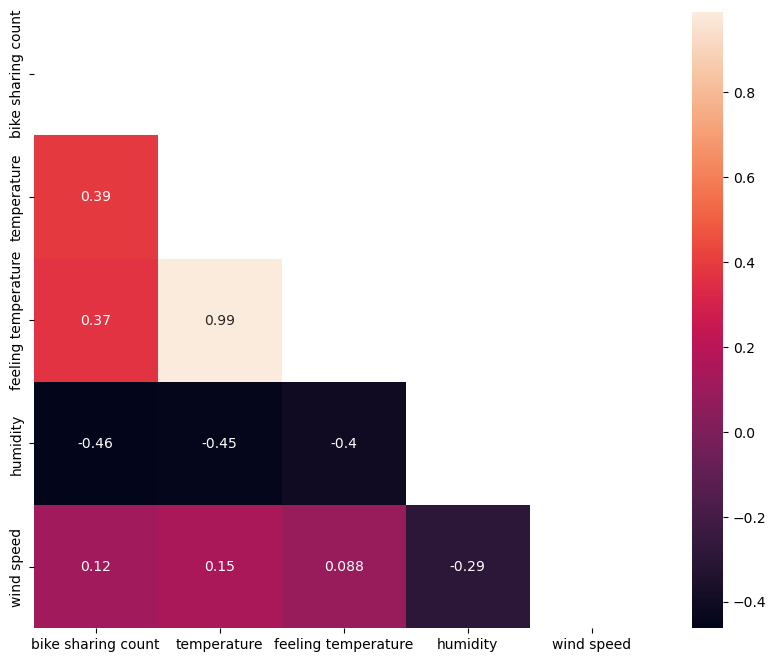

<Figure size 640x480 with 0 Axes>

In [78]:
mask = np.zeros_like(numeric.corr())
mask[np.triu_indices_from(mask)] = True 

fig,ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(numeric.corr(), mask=mask, annot=True)
plt.show()
plt.savefig('heatmap.jpg')

/Users/giselles/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



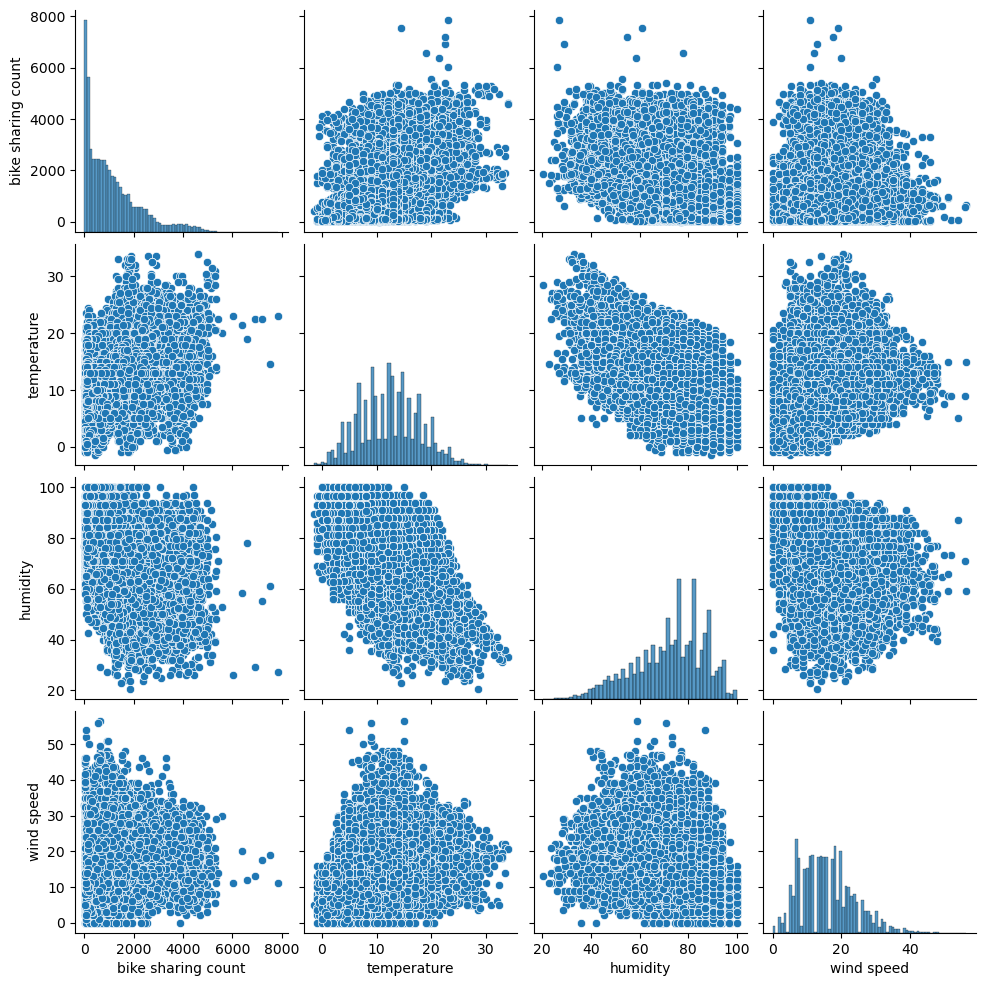

In [77]:
numeric1 = df[['bike sharing count', 'temperature', 'humidity', 'wind speed']]
sns.pairplot(numeric1)
plt.savefig('correlation.png')

In [51]:
fig = go.Figure(data=go.Violin(y=df['bike sharing count'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x=df['weather']))

fig.update_layout(yaxis_zeroline=False, title="Weather")


In [52]:
fig = go.Figure(data=go.Violin(y=df['bike sharing count'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x=df['holiday']))

fig.update_layout(yaxis_zeroline=False, title='Holiday')

In [53]:
fig = go.Figure(data=go.Violin(y=df['bike sharing count'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x=df['weekend']))

fig.update_layout(yaxis_zeroline=False, title='Weekend')

In [54]:
fig = go.Figure(data=go.Violin(y=df['bike sharing count'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x=df['season']))

fig.update_layout(yaxis_zeroline=False, title='Season')

In [26]:
fig = px.histogram(df, x="timestamp", y='bike sharing count', histfunc='sum')
fig.show()

In [28]:
fig = px.histogram(df, x="month", y='bike sharing count', histfunc='sum')
fig.show()

In [71]:
fig = px.histogram(df, x="temperature", y='bike sharing count', histfunc='sum')
fig.show()